In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
data = pd.read_parquet('/main/data/MVideo_2/dataset_main_6_m_3.parquet')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1163328 entries, 0 to 1163327
Columns: 108 entries, STORE_ID to UNITS_SOLD_P3
dtypes: category(8), datetime64[ns](1), float32(77), int32(22)
memory usage: 468.2 MB


In [5]:
data_train = data[data.DATE < '2018-01-28']

In [6]:
data_train.shape[0]

894852

In [7]:
data_train2 = data[data.DATE <= '2018-02-18']

In [8]:
data_train2.shape[0]

1026469

In [9]:
data_val = data[(data.DATE >= '2018-01-28') & (data.DATE <= '2018-02-18')]

In [10]:
data_val.shape[0]

131617

In [11]:
data_test = data[data.DATE == '2018-03-18']

In [12]:
data_test.shape[0]

34790

In [13]:
feat = [s for s in data.columns if s not in ['DATE', 'UNITS_SOLD_P3']]

In [14]:
dts = lgb.Dataset(data_train[feat], label = data_train.UNITS_SOLD_P3)

In [15]:
dts = dts.construct()

In [16]:
dtsv = dts.create_valid(data_val[feat], label = data_val.UNITS_SOLD_P3)

In [17]:
params = {'application': 'regression_l2',
 'learning_rate': 0.01,
 'num_leaves': 1023,
 'min_data_in_leaf': 20,
 'min_sum_hessian_in_leaf': 0.1,
 'feature_fraction': 0.5,
 'bagging_fraction': 0.9,
 'bagging_freq': 9,
 'lambda_l2': 0.0359,
 'metric': 'l2_root'}

In [18]:
bst = lgb.train(params, dts, valid_sets = [dtsv], valid_names = ['Validation'],
                num_boost_round = 10000, early_stopping_rounds = 20)

[1]	Validation's rmse: 1.97334
Training until validation scores don't improve for 20 rounds.
[2]	Validation's rmse: 1.9656
[3]	Validation's rmse: 1.95832
[4]	Validation's rmse: 1.95099
[5]	Validation's rmse: 1.94426
[6]	Validation's rmse: 1.93772
[7]	Validation's rmse: 1.93099
[8]	Validation's rmse: 1.92455
[9]	Validation's rmse: 1.91824
[10]	Validation's rmse: 1.91243
[11]	Validation's rmse: 1.9062
[12]	Validation's rmse: 1.90024
[13]	Validation's rmse: 1.89418
[14]	Validation's rmse: 1.88832
[15]	Validation's rmse: 1.88192
[16]	Validation's rmse: 1.87519
[17]	Validation's rmse: 1.86958
[18]	Validation's rmse: 1.86376
[19]	Validation's rmse: 1.85859
[20]	Validation's rmse: 1.85341
[21]	Validation's rmse: 1.84837
[22]	Validation's rmse: 1.84269
[23]	Validation's rmse: 1.83689
[24]	Validation's rmse: 1.8315
[25]	Validation's rmse: 1.82681
[26]	Validation's rmse: 1.82158
[27]	Validation's rmse: 1.8167
[28]	Validation's rmse: 1.81194
[29]	Validation's rmse: 1.80669
[30]	Validation's rmse:

[252]	Validation's rmse: 1.56176
[253]	Validation's rmse: 1.56194
[254]	Validation's rmse: 1.56191
[255]	Validation's rmse: 1.56178
[256]	Validation's rmse: 1.56174
[257]	Validation's rmse: 1.56169
[258]	Validation's rmse: 1.56166
[259]	Validation's rmse: 1.56144
[260]	Validation's rmse: 1.56141
[261]	Validation's rmse: 1.56134
[262]	Validation's rmse: 1.56135
[263]	Validation's rmse: 1.56126
[264]	Validation's rmse: 1.56119
[265]	Validation's rmse: 1.56116
[266]	Validation's rmse: 1.56112
[267]	Validation's rmse: 1.56104
[268]	Validation's rmse: 1.56102
[269]	Validation's rmse: 1.56089
[270]	Validation's rmse: 1.56079
[271]	Validation's rmse: 1.5607
[272]	Validation's rmse: 1.56059
[273]	Validation's rmse: 1.56046
[274]	Validation's rmse: 1.56041
[275]	Validation's rmse: 1.56028
[276]	Validation's rmse: 1.56014
[277]	Validation's rmse: 1.56018
[278]	Validation's rmse: 1.56019
[279]	Validation's rmse: 1.56008
[280]	Validation's rmse: 1.56011
[281]	Validation's rmse: 1.56008
[282]	Valid

[501]	Validation's rmse: 1.54752
[502]	Validation's rmse: 1.54745
[503]	Validation's rmse: 1.54741
[504]	Validation's rmse: 1.54735
[505]	Validation's rmse: 1.54726
[506]	Validation's rmse: 1.5472
[507]	Validation's rmse: 1.54711
[508]	Validation's rmse: 1.54711
[509]	Validation's rmse: 1.54708
[510]	Validation's rmse: 1.54701
[511]	Validation's rmse: 1.54693
[512]	Validation's rmse: 1.54686
[513]	Validation's rmse: 1.5468
[514]	Validation's rmse: 1.5468
[515]	Validation's rmse: 1.54677
[516]	Validation's rmse: 1.54672
[517]	Validation's rmse: 1.54668
[518]	Validation's rmse: 1.5466
[519]	Validation's rmse: 1.54657
[520]	Validation's rmse: 1.54647
[521]	Validation's rmse: 1.54644
[522]	Validation's rmse: 1.54645
[523]	Validation's rmse: 1.5464
[524]	Validation's rmse: 1.54639
[525]	Validation's rmse: 1.54631
[526]	Validation's rmse: 1.5463
[527]	Validation's rmse: 1.54623
[528]	Validation's rmse: 1.54616
[529]	Validation's rmse: 1.54608
[530]	Validation's rmse: 1.54603
[531]	Validation

[751]	Validation's rmse: 1.53721
[752]	Validation's rmse: 1.53716
[753]	Validation's rmse: 1.53711
[754]	Validation's rmse: 1.53709
[755]	Validation's rmse: 1.53714
[756]	Validation's rmse: 1.53705
[757]	Validation's rmse: 1.53699
[758]	Validation's rmse: 1.53695
[759]	Validation's rmse: 1.53689
[760]	Validation's rmse: 1.53689
[761]	Validation's rmse: 1.53686
[762]	Validation's rmse: 1.53681
[763]	Validation's rmse: 1.53676
[764]	Validation's rmse: 1.53671
[765]	Validation's rmse: 1.53669
[766]	Validation's rmse: 1.53667
[767]	Validation's rmse: 1.53667
[768]	Validation's rmse: 1.53659
[769]	Validation's rmse: 1.53657
[770]	Validation's rmse: 1.53654
[771]	Validation's rmse: 1.53655
[772]	Validation's rmse: 1.53645
[773]	Validation's rmse: 1.53639
[774]	Validation's rmse: 1.53635
[775]	Validation's rmse: 1.53626
[776]	Validation's rmse: 1.53627
[777]	Validation's rmse: 1.5362
[778]	Validation's rmse: 1.53618
[779]	Validation's rmse: 1.53613
[780]	Validation's rmse: 1.53609
[781]	Valid

[1001]	Validation's rmse: 1.53071
[1002]	Validation's rmse: 1.5307
[1003]	Validation's rmse: 1.53068
[1004]	Validation's rmse: 1.53066
[1005]	Validation's rmse: 1.53069
[1006]	Validation's rmse: 1.53064
[1007]	Validation's rmse: 1.53059
[1008]	Validation's rmse: 1.53054
[1009]	Validation's rmse: 1.53053
[1010]	Validation's rmse: 1.53051
[1011]	Validation's rmse: 1.53045
[1012]	Validation's rmse: 1.53037
[1013]	Validation's rmse: 1.53035
[1014]	Validation's rmse: 1.53031
[1015]	Validation's rmse: 1.53028
[1016]	Validation's rmse: 1.53023
[1017]	Validation's rmse: 1.53021
[1018]	Validation's rmse: 1.53018
[1019]	Validation's rmse: 1.53016
[1020]	Validation's rmse: 1.53016
[1021]	Validation's rmse: 1.53014
[1022]	Validation's rmse: 1.53012
[1023]	Validation's rmse: 1.53007
[1024]	Validation's rmse: 1.5301
[1025]	Validation's rmse: 1.53013
[1026]	Validation's rmse: 1.53012
[1027]	Validation's rmse: 1.53004
[1028]	Validation's rmse: 1.53
[1029]	Validation's rmse: 1.52998
[1030]	Validation's

[1243]	Validation's rmse: 1.52638
[1244]	Validation's rmse: 1.52635
[1245]	Validation's rmse: 1.52636
[1246]	Validation's rmse: 1.52638
[1247]	Validation's rmse: 1.52637
[1248]	Validation's rmse: 1.52636
[1249]	Validation's rmse: 1.52637
[1250]	Validation's rmse: 1.52636
[1251]	Validation's rmse: 1.52637
[1252]	Validation's rmse: 1.52635
[1253]	Validation's rmse: 1.52634
[1254]	Validation's rmse: 1.52634
[1255]	Validation's rmse: 1.52634
[1256]	Validation's rmse: 1.52634
[1257]	Validation's rmse: 1.52633
[1258]	Validation's rmse: 1.52628
[1259]	Validation's rmse: 1.52629
[1260]	Validation's rmse: 1.52629
[1261]	Validation's rmse: 1.52631
[1262]	Validation's rmse: 1.5263
[1263]	Validation's rmse: 1.52631
[1264]	Validation's rmse: 1.52633
[1265]	Validation's rmse: 1.52633
[1266]	Validation's rmse: 1.52633
[1267]	Validation's rmse: 1.52633
[1268]	Validation's rmse: 1.52629
[1269]	Validation's rmse: 1.52629
[1270]	Validation's rmse: 1.52626
[1271]	Validation's rmse: 1.52622
[1272]	Validati

[1485]	Validation's rmse: 1.5233
[1486]	Validation's rmse: 1.52329
[1487]	Validation's rmse: 1.52328
[1488]	Validation's rmse: 1.52326
[1489]	Validation's rmse: 1.52326
[1490]	Validation's rmse: 1.52323
[1491]	Validation's rmse: 1.5233
[1492]	Validation's rmse: 1.52327
[1493]	Validation's rmse: 1.52327
[1494]	Validation's rmse: 1.52326
[1495]	Validation's rmse: 1.52326
[1496]	Validation's rmse: 1.52326
[1497]	Validation's rmse: 1.52325
[1498]	Validation's rmse: 1.52323
[1499]	Validation's rmse: 1.5232
[1500]	Validation's rmse: 1.52321
[1501]	Validation's rmse: 1.52321
[1502]	Validation's rmse: 1.52319
[1503]	Validation's rmse: 1.52325
[1504]	Validation's rmse: 1.52327
[1505]	Validation's rmse: 1.52325
[1506]	Validation's rmse: 1.52327
[1507]	Validation's rmse: 1.52326
[1508]	Validation's rmse: 1.52325
[1509]	Validation's rmse: 1.52327
[1510]	Validation's rmse: 1.52323
[1511]	Validation's rmse: 1.52323
[1512]	Validation's rmse: 1.52322
[1513]	Validation's rmse: 1.52318
[1514]	Validation

[1727]	Validation's rmse: 1.52101
[1728]	Validation's rmse: 1.521
[1729]	Validation's rmse: 1.521
[1730]	Validation's rmse: 1.52098
[1731]	Validation's rmse: 1.52094
[1732]	Validation's rmse: 1.52093
[1733]	Validation's rmse: 1.52091
[1734]	Validation's rmse: 1.52089
[1735]	Validation's rmse: 1.52087
[1736]	Validation's rmse: 1.52087
[1737]	Validation's rmse: 1.52085
[1738]	Validation's rmse: 1.52084
[1739]	Validation's rmse: 1.52084
[1740]	Validation's rmse: 1.52081
[1741]	Validation's rmse: 1.5208
[1742]	Validation's rmse: 1.52081
[1743]	Validation's rmse: 1.52083
[1744]	Validation's rmse: 1.52082
[1745]	Validation's rmse: 1.52083
[1746]	Validation's rmse: 1.52083
[1747]	Validation's rmse: 1.52082
[1748]	Validation's rmse: 1.52081
[1749]	Validation's rmse: 1.52079
[1750]	Validation's rmse: 1.52078
[1751]	Validation's rmse: 1.52077
[1752]	Validation's rmse: 1.52075
[1753]	Validation's rmse: 1.52074
[1754]	Validation's rmse: 1.52073
[1755]	Validation's rmse: 1.52069
[1756]	Validation's

[1969]	Validation's rmse: 1.51867
[1970]	Validation's rmse: 1.51866
[1971]	Validation's rmse: 1.51866
[1972]	Validation's rmse: 1.51865
[1973]	Validation's rmse: 1.51866
[1974]	Validation's rmse: 1.51863
[1975]	Validation's rmse: 1.51862
[1976]	Validation's rmse: 1.51861
[1977]	Validation's rmse: 1.5186
[1978]	Validation's rmse: 1.51861
[1979]	Validation's rmse: 1.5186
[1980]	Validation's rmse: 1.51859
[1981]	Validation's rmse: 1.51859
[1982]	Validation's rmse: 1.51859
[1983]	Validation's rmse: 1.51858
[1984]	Validation's rmse: 1.51859
[1985]	Validation's rmse: 1.51857
[1986]	Validation's rmse: 1.51856
[1987]	Validation's rmse: 1.51855
[1988]	Validation's rmse: 1.51854
[1989]	Validation's rmse: 1.51854
[1990]	Validation's rmse: 1.51851
[1991]	Validation's rmse: 1.5185
[1992]	Validation's rmse: 1.51849
[1993]	Validation's rmse: 1.51847
[1994]	Validation's rmse: 1.51845
[1995]	Validation's rmse: 1.51845
[1996]	Validation's rmse: 1.51843
[1997]	Validation's rmse: 1.51842
[1998]	Validation

[2211]	Validation's rmse: 1.51691
[2212]	Validation's rmse: 1.5169
[2213]	Validation's rmse: 1.51688
[2214]	Validation's rmse: 1.51686
[2215]	Validation's rmse: 1.51688
[2216]	Validation's rmse: 1.51687
[2217]	Validation's rmse: 1.51687
[2218]	Validation's rmse: 1.51684
[2219]	Validation's rmse: 1.51684
[2220]	Validation's rmse: 1.51684
[2221]	Validation's rmse: 1.51684
[2222]	Validation's rmse: 1.51685
[2223]	Validation's rmse: 1.51684
[2224]	Validation's rmse: 1.51684
[2225]	Validation's rmse: 1.51683
[2226]	Validation's rmse: 1.51684
[2227]	Validation's rmse: 1.51682
[2228]	Validation's rmse: 1.51681
[2229]	Validation's rmse: 1.51679
[2230]	Validation's rmse: 1.51681
[2231]	Validation's rmse: 1.51681
[2232]	Validation's rmse: 1.51679
[2233]	Validation's rmse: 1.51678
[2234]	Validation's rmse: 1.51676
[2235]	Validation's rmse: 1.51673
[2236]	Validation's rmse: 1.51673
[2237]	Validation's rmse: 1.51672
[2238]	Validation's rmse: 1.51672
[2239]	Validation's rmse: 1.51671
[2240]	Validati

[2453]	Validation's rmse: 1.51544
[2454]	Validation's rmse: 1.51543
[2455]	Validation's rmse: 1.51541
[2456]	Validation's rmse: 1.51542
[2457]	Validation's rmse: 1.51543
[2458]	Validation's rmse: 1.51544
[2459]	Validation's rmse: 1.51544
[2460]	Validation's rmse: 1.51544
[2461]	Validation's rmse: 1.51545
[2462]	Validation's rmse: 1.51545
[2463]	Validation's rmse: 1.51543
[2464]	Validation's rmse: 1.51543
[2465]	Validation's rmse: 1.51542
[2466]	Validation's rmse: 1.51542
[2467]	Validation's rmse: 1.51543
[2468]	Validation's rmse: 1.51542
[2469]	Validation's rmse: 1.51541
[2470]	Validation's rmse: 1.5154
[2471]	Validation's rmse: 1.5154
[2472]	Validation's rmse: 1.51537
[2473]	Validation's rmse: 1.51537
[2474]	Validation's rmse: 1.51537
[2475]	Validation's rmse: 1.51537
[2476]	Validation's rmse: 1.51537
[2477]	Validation's rmse: 1.51536
[2478]	Validation's rmse: 1.51535
[2479]	Validation's rmse: 1.51534
[2480]	Validation's rmse: 1.51533
[2481]	Validation's rmse: 1.51534
[2482]	Validatio

[2695]	Validation's rmse: 1.51418
[2696]	Validation's rmse: 1.51415
[2697]	Validation's rmse: 1.51414
[2698]	Validation's rmse: 1.51412
[2699]	Validation's rmse: 1.51412
[2700]	Validation's rmse: 1.5141
[2701]	Validation's rmse: 1.51409
[2702]	Validation's rmse: 1.51408
[2703]	Validation's rmse: 1.51407
[2704]	Validation's rmse: 1.51408
[2705]	Validation's rmse: 1.51409
[2706]	Validation's rmse: 1.51408
[2707]	Validation's rmse: 1.51407
[2708]	Validation's rmse: 1.51407
[2709]	Validation's rmse: 1.51407
[2710]	Validation's rmse: 1.51407
[2711]	Validation's rmse: 1.51404
[2712]	Validation's rmse: 1.51403
[2713]	Validation's rmse: 1.51403
[2714]	Validation's rmse: 1.51403
[2715]	Validation's rmse: 1.51403
[2716]	Validation's rmse: 1.51405
[2717]	Validation's rmse: 1.51405
[2718]	Validation's rmse: 1.51406
[2719]	Validation's rmse: 1.51405
[2720]	Validation's rmse: 1.51404
[2721]	Validation's rmse: 1.51404
[2722]	Validation's rmse: 1.51401
[2723]	Validation's rmse: 1.514
[2724]	Validation

[2937]	Validation's rmse: 1.5126
[2938]	Validation's rmse: 1.51261
[2939]	Validation's rmse: 1.51261
[2940]	Validation's rmse: 1.51261
[2941]	Validation's rmse: 1.51259
[2942]	Validation's rmse: 1.51259
[2943]	Validation's rmse: 1.51259
[2944]	Validation's rmse: 1.51258
[2945]	Validation's rmse: 1.51258
[2946]	Validation's rmse: 1.51257
[2947]	Validation's rmse: 1.51257
[2948]	Validation's rmse: 1.51256
[2949]	Validation's rmse: 1.51252
[2950]	Validation's rmse: 1.51251
[2951]	Validation's rmse: 1.51251
[2952]	Validation's rmse: 1.51249
[2953]	Validation's rmse: 1.51249
[2954]	Validation's rmse: 1.51249
[2955]	Validation's rmse: 1.51249
[2956]	Validation's rmse: 1.51248
[2957]	Validation's rmse: 1.51249
[2958]	Validation's rmse: 1.51249
[2959]	Validation's rmse: 1.51248
[2960]	Validation's rmse: 1.51249
[2961]	Validation's rmse: 1.51248
[2962]	Validation's rmse: 1.51248
[2963]	Validation's rmse: 1.51249
[2964]	Validation's rmse: 1.51248
[2965]	Validation's rmse: 1.51245
[2966]	Validati

[3181]	Validation's rmse: 1.51159
[3182]	Validation's rmse: 1.51158
[3183]	Validation's rmse: 1.51157
[3184]	Validation's rmse: 1.51156
[3185]	Validation's rmse: 1.51157
[3186]	Validation's rmse: 1.51157
[3187]	Validation's rmse: 1.51157
[3188]	Validation's rmse: 1.51156
[3189]	Validation's rmse: 1.51156
[3190]	Validation's rmse: 1.51154
[3191]	Validation's rmse: 1.51153
[3192]	Validation's rmse: 1.51154
[3193]	Validation's rmse: 1.51154
[3194]	Validation's rmse: 1.51152
[3195]	Validation's rmse: 1.51152
[3196]	Validation's rmse: 1.51151
[3197]	Validation's rmse: 1.51151
[3198]	Validation's rmse: 1.5115
[3199]	Validation's rmse: 1.5115
[3200]	Validation's rmse: 1.5115
[3201]	Validation's rmse: 1.51149
[3202]	Validation's rmse: 1.51148
[3203]	Validation's rmse: 1.51148
[3204]	Validation's rmse: 1.51148
[3205]	Validation's rmse: 1.51145
[3206]	Validation's rmse: 1.51147
[3207]	Validation's rmse: 1.51147
[3208]	Validation's rmse: 1.51147
[3209]	Validation's rmse: 1.51147
[3210]	Validation

[3424]	Validation's rmse: 1.5107
[3425]	Validation's rmse: 1.51069
[3426]	Validation's rmse: 1.51069
[3427]	Validation's rmse: 1.51069
[3428]	Validation's rmse: 1.51069
[3429]	Validation's rmse: 1.51068
[3430]	Validation's rmse: 1.51067
[3431]	Validation's rmse: 1.51067
[3432]	Validation's rmse: 1.51066
[3433]	Validation's rmse: 1.51067
[3434]	Validation's rmse: 1.51066
[3435]	Validation's rmse: 1.51066
[3436]	Validation's rmse: 1.51065
[3437]	Validation's rmse: 1.51065
[3438]	Validation's rmse: 1.51064
[3439]	Validation's rmse: 1.51064
[3440]	Validation's rmse: 1.51064
[3441]	Validation's rmse: 1.51062
[3442]	Validation's rmse: 1.51063
[3443]	Validation's rmse: 1.51063
[3444]	Validation's rmse: 1.51063
[3445]	Validation's rmse: 1.51062
[3446]	Validation's rmse: 1.51061
[3447]	Validation's rmse: 1.5106
[3448]	Validation's rmse: 1.51059
[3449]	Validation's rmse: 1.51059
[3450]	Validation's rmse: 1.51059
[3451]	Validation's rmse: 1.5106
[3452]	Validation's rmse: 1.51059
[3453]	Validation

In [19]:
pred = bst.predict(data_test[feat])

In [20]:
np.sqrt(mean_squared_error(data_test.UNITS_SOLD_P3, pred))

1.3760538009753895

In [21]:
mean_absolute_error(data_test.UNITS_SOLD_P3, pred)

0.7973859861230297

In [22]:
pred2 = bst.predict(data_val[feat])

In [23]:
res = data_val[['DATE', 'PRODUCT_ID', 'STORE_ID', 'UNITS_SOLD_P3']].copy()

In [24]:
res['PRED_P3'] = pred2

In [25]:
def plot_ts(df, store_id, product_id):
    data_part = df[(df['STORE_ID'] == store_id) & (df['PRODUCT_ID'] == product_id)]
    week_range = data_part.DATE.drop_duplicates().sort_values().values
    #week_range = np.arange(data_part['DATE'].min(), data_part['DATE'].max())# + 1)
    ts = pd.DataFrame()
    ts['DATE'] = week_range
    df = pd.merge(ts, data_part, on = 'DATE', how = 'left')[['DATE', 'UNITS_SOLD_P3', 'PRED_P3']].fillna(0)
    plt.figure(figsize=(15, 4))
    plt.plot(df['DATE'].values, df['UNITS_SOLD_P3'].values, 'g^-', label='true')
    plt.plot(df['DATE'].values, df['PRED_P3'].values, 'ro-', label='pred')
    plt.xlabel('Week')
    plt.ylabel('Units sold')
    max_y = max(1, df['UNITS_SOLD_P3'].max(), df['PRED_P3'].max())
    plt.ylim((-0.05, max_y + 0.1))
    plt.title('The ts for product - %s and store - %s' % (product_id, store_id))
    plt.legend(loc='best')
    plt.show()

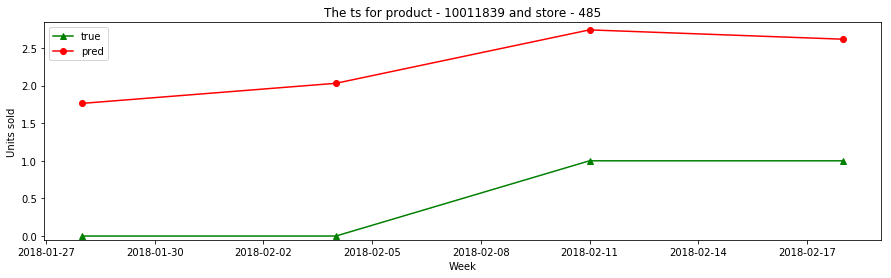

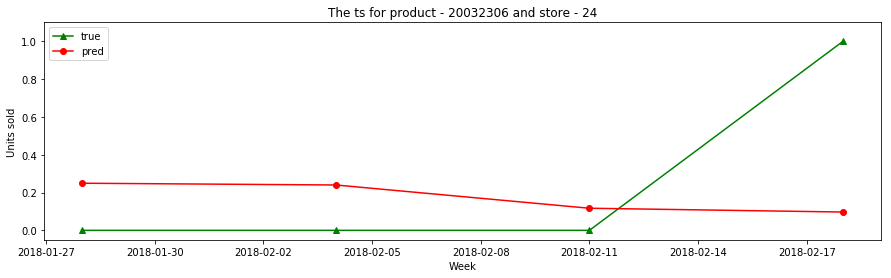

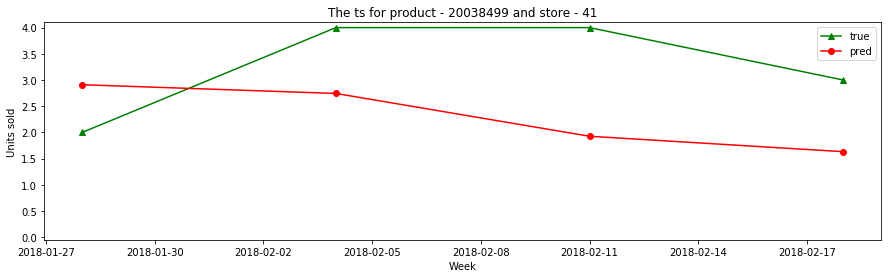

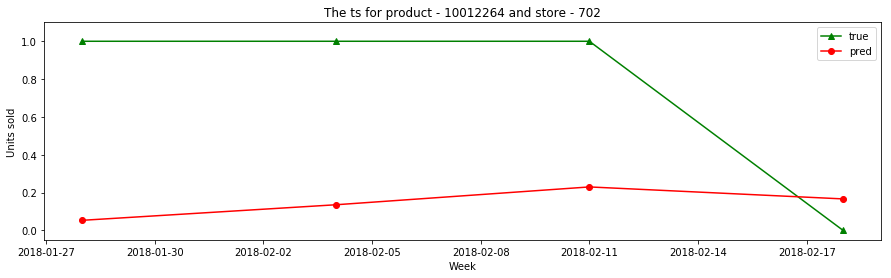

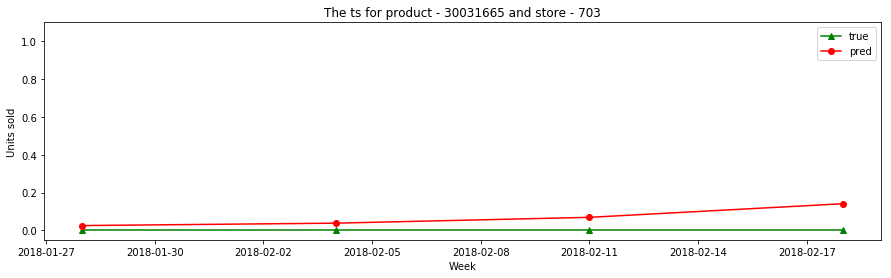

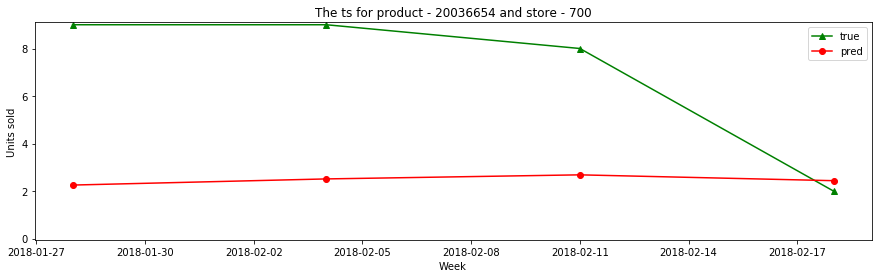

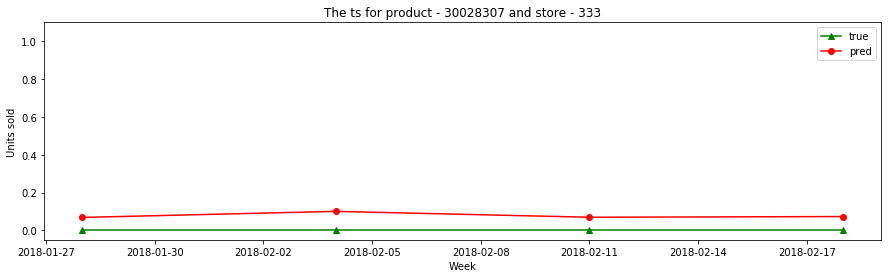

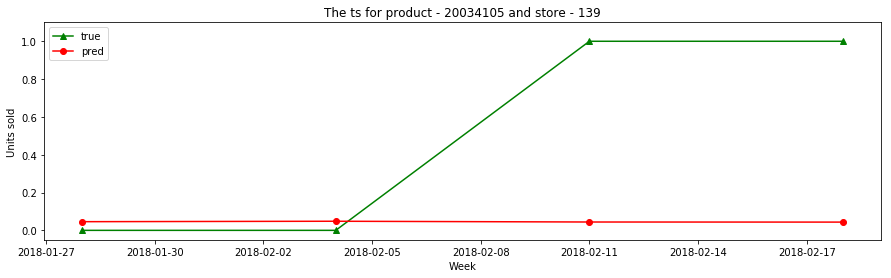

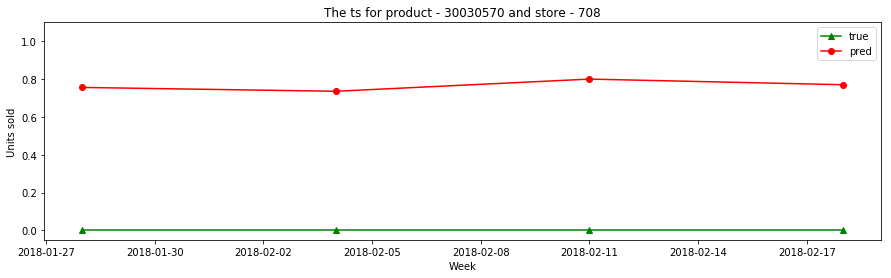

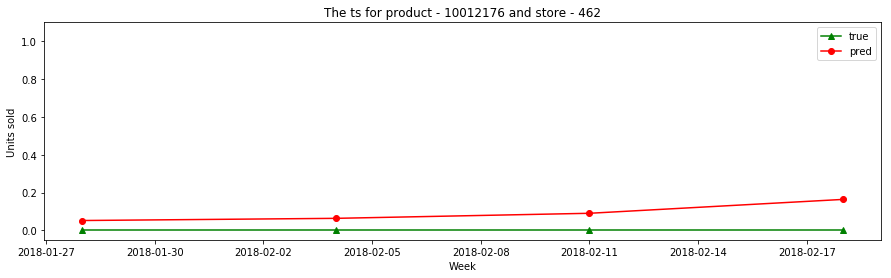

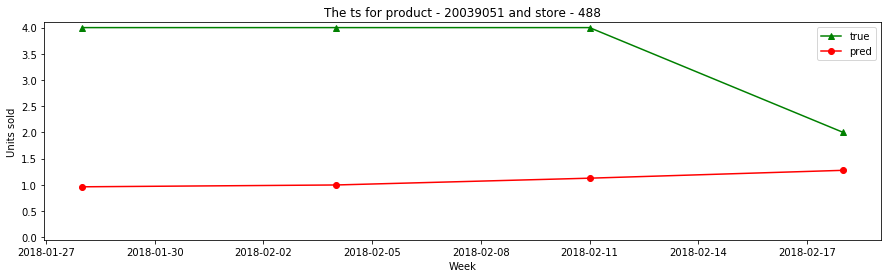

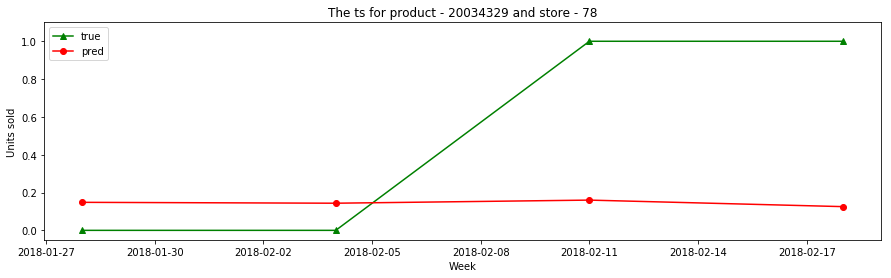

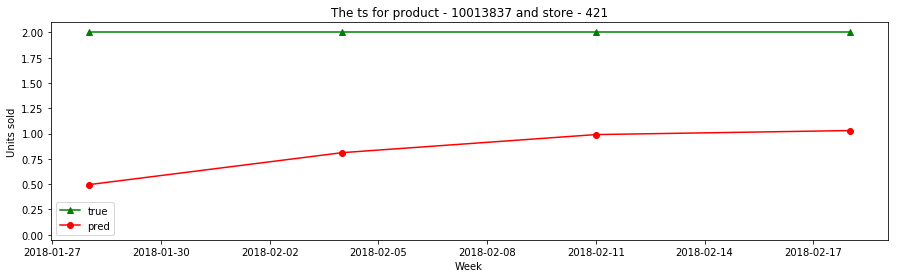

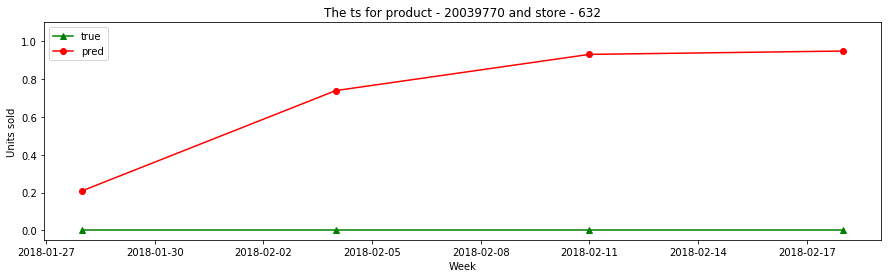

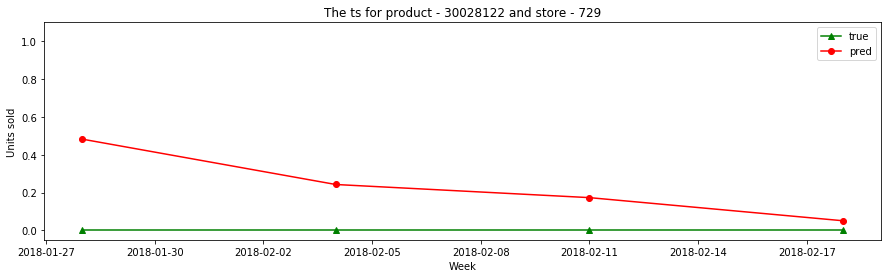

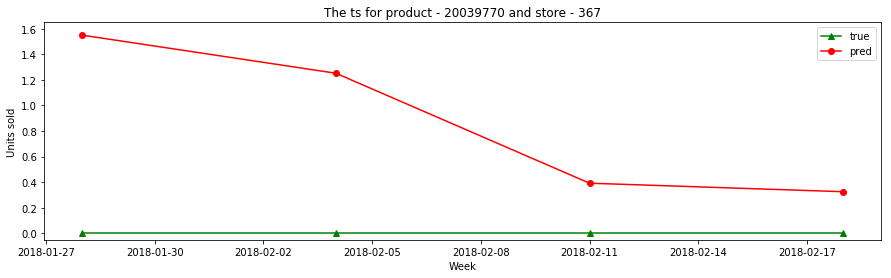

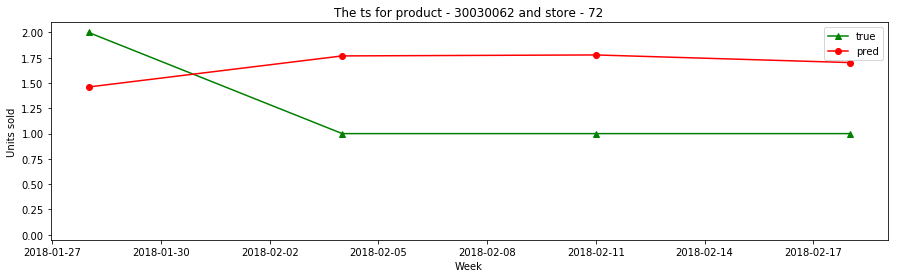

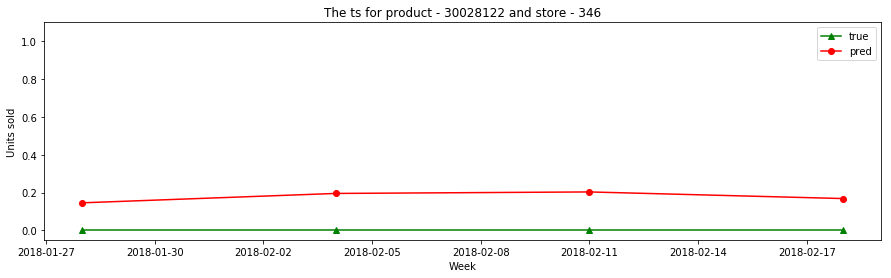

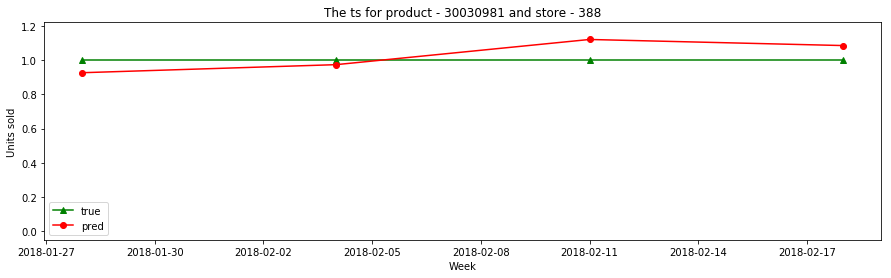

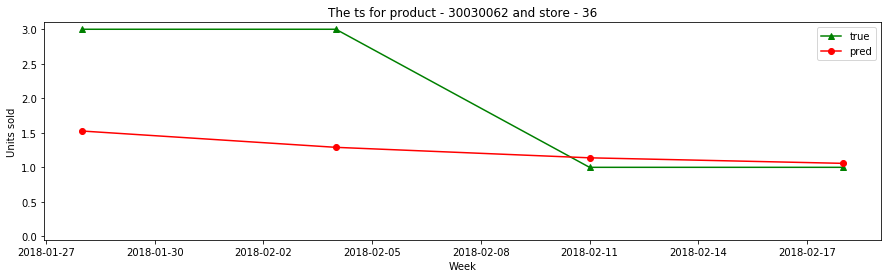

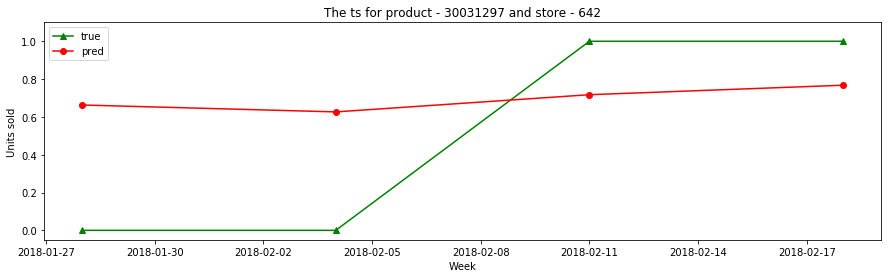

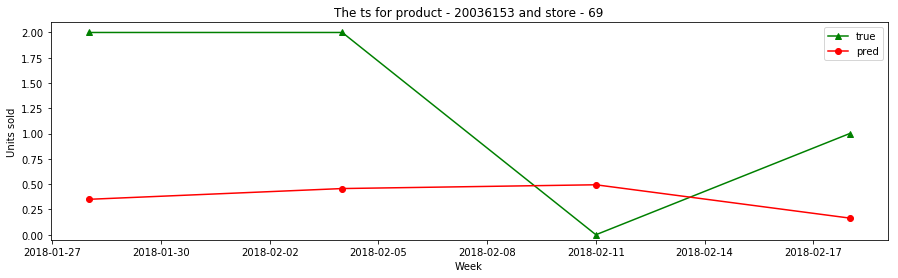

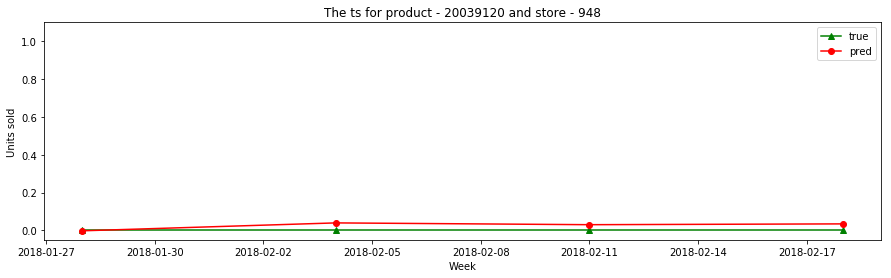

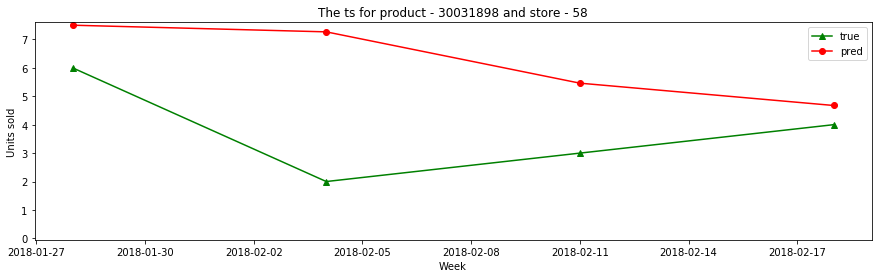

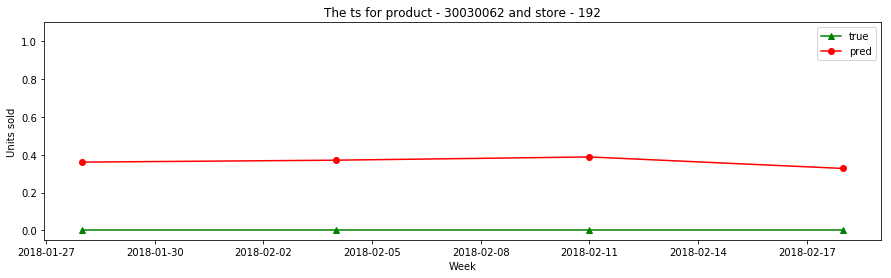

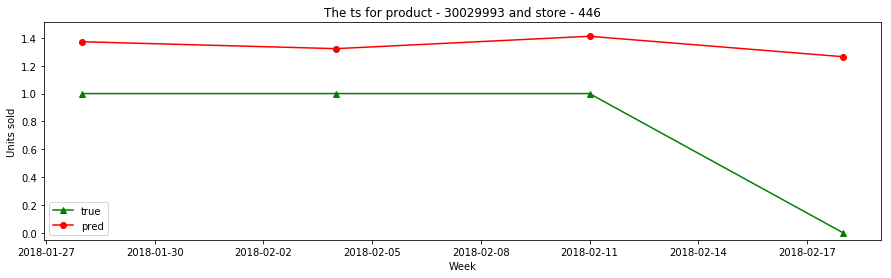

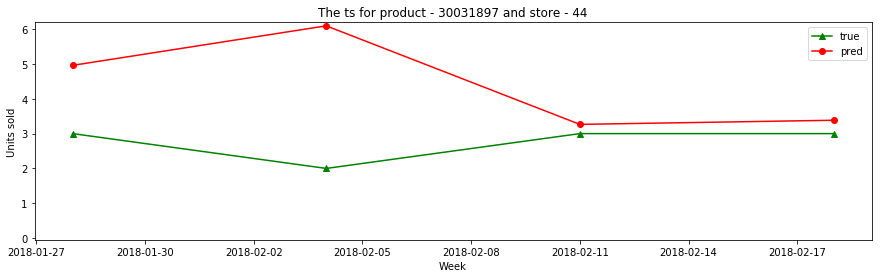

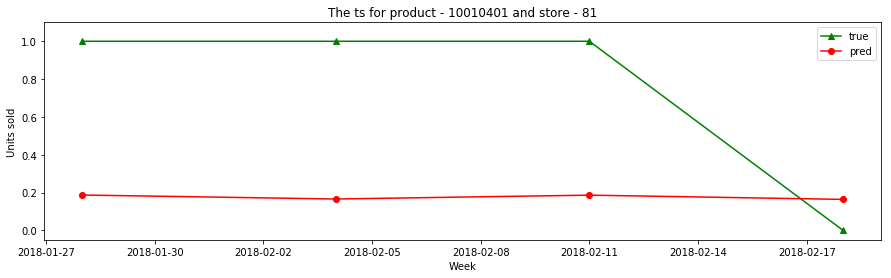

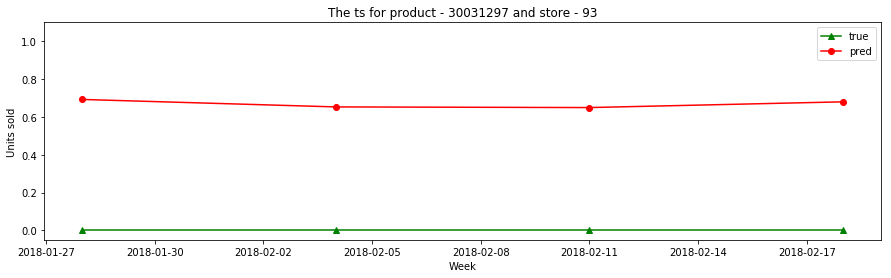

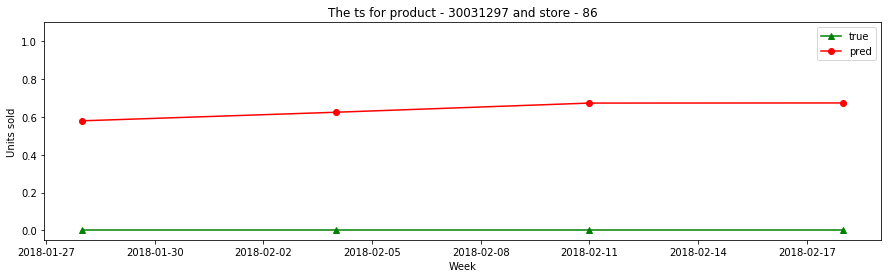

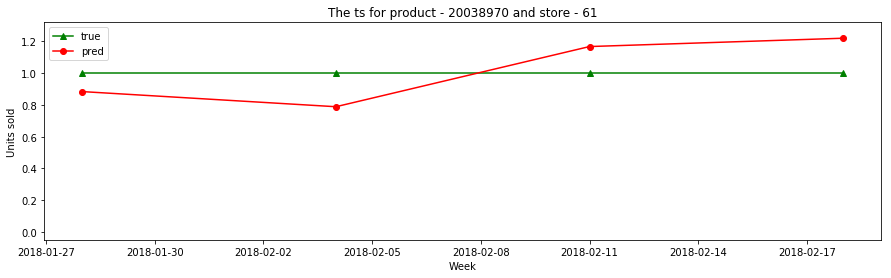

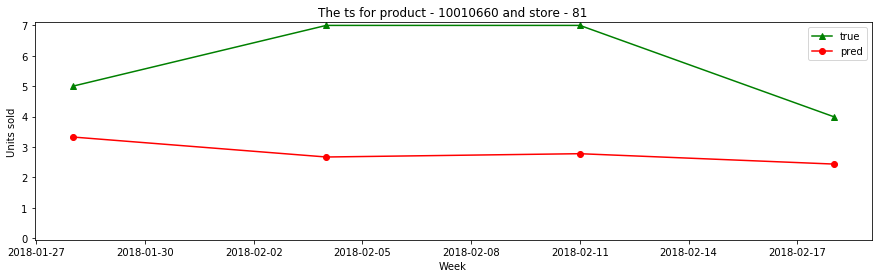

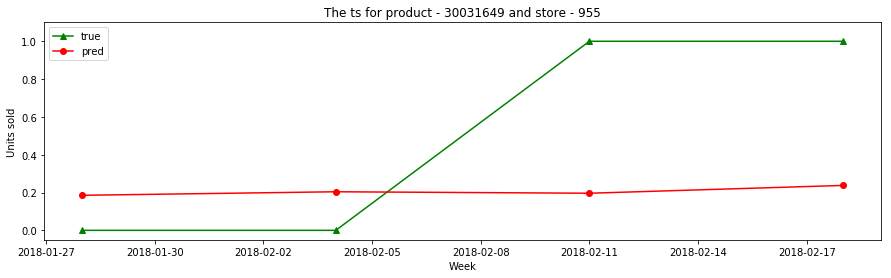

In [26]:
pairs = list(set(zip(res['STORE_ID'], res['PRODUCT_ID'])))

for i in range(len(pairs) // 1000):
    store_id, product_id = pairs[i]
    plot_ts(res, store_id, product_id)

In [27]:
dts2 = lgb.Dataset(data_train2[feat], label = data_train2.UNITS_SOLD_P3)

In [28]:
dts2 = dts2.construct()

In [29]:
bst.current_iteration()

3472

In [30]:
bst2 = lgb.train(params, dts2, num_boost_round = bst.current_iteration())

In [31]:
pred3 = bst2.predict(data_test[feat])

In [32]:
np.sqrt(mean_squared_error(data_test.UNITS_SOLD_P3, pred3))

1.3066437370625372

In [33]:
mean_absolute_error(data_test.UNITS_SOLD_P3, pred3)

0.7834968565679584

In [34]:
sc = bst2.feature_importance(importance_type='gain')

In [35]:
score = pd.DataFrame(100 * sc / np.sum(sc),
                     index = bst2.feature_name(), columns = ['Score'])

In [36]:
score = score.sort_values('Score', ascending=False)

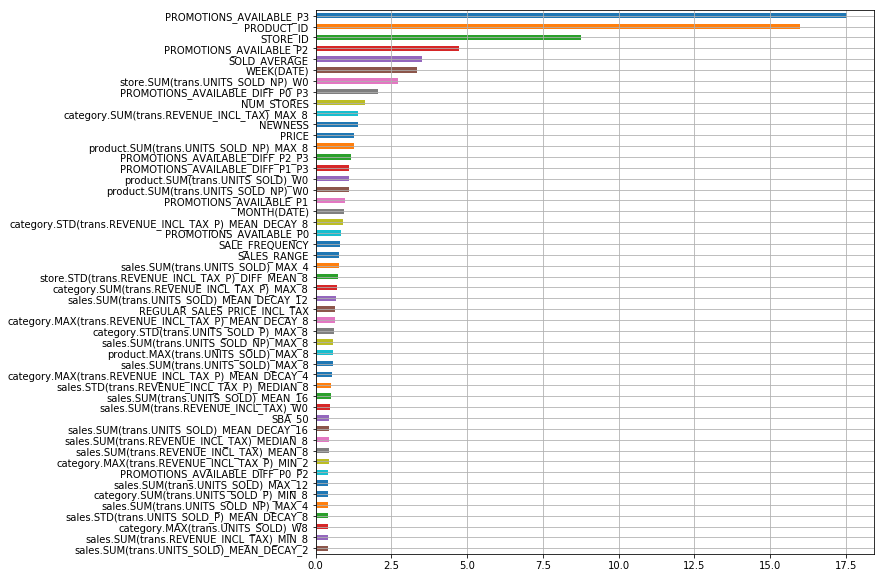

In [37]:
score.head(50).Score.plot.barh(grid=True, figsize=(10,10)).invert_yaxis()

In [38]:
res2 = data_test[['PRODUCT_ID', 'STORE_ID']].copy()

In [39]:
res2['PRED'] = pred3

In [40]:
res3 = pd.read_parquet('/main/data/MVideo_2/dataset_test_6.parquet')

In [41]:
res3 = res3[(res3.DATE > '2018-05-13') & (res3.DATE <= '2018-06-10')].copy()

In [42]:
res3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139160 entries, 278320 to 417479
Data columns (total 4 columns):
STORE_ID      139160 non-null category
PRODUCT_ID    139160 non-null category
DATE          139160 non-null datetime64[ns]
UNITS_SOLD    139160 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 3.8 MB


In [43]:
res3 = res3.merge(res2)

In [44]:
res3.PRED /= 4

In [45]:
res3.PRED.clip(lower = 0, inplace = True)

In [46]:
res3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139160 entries, 0 to 139159
Data columns (total 5 columns):
STORE_ID      139160 non-null category
PRODUCT_ID    139160 non-null category
DATE          139160 non-null datetime64[ns]
UNITS_SOLD    139160 non-null float64
PRED          139160 non-null float64
dtypes: category(2), datetime64[ns](1), float64(2)
memory usage: 4.8 MB


In [47]:
np.sqrt(mean_squared_error(res3.UNITS_SOLD, res3.PRED))

0.574118571938356

In [48]:
mean_absolute_error(res3.UNITS_SOLD, res3.PRED)

0.31349213870574816

In [49]:
res3.to_parquet('/main/data/MVideo_2/results_6_m_3.parquet')